## Summary

This notebook is dedicated to exploring various base models to predict heroin usage and evaluating their performance through confusion matrices.

# INDEX

[Base Models](#Base)


- [Logistic Regression](#logreg)
- [Coefficient analysis](#Coef)
- [Correlations](#Corr)
- [Logistinc Regression Confusion Matrix](#logconf)
- [Decision Tree](#DT)
- [Decision Tree Confusion Matrix](#DTconf)
<a id='INDEX'></a>

In [1]:
import pandas as pd
import numpy as np


# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency,ttest_ind
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('drug_consumption_model_ready.csv')

## Base Models <a id='Base'></a>

I am trying to predict the likelihood of `Heroin` use based on patterns of other drug usage. Going to try Logistic Regression and Decision Tree.

In [3]:
# Split the data into train and test with 75% volume in training dataset and 25% in testing dataset

X = df.drop(['Heroin','Unnamed: 0'],axis=1)
y = df['Heroin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [ ]:
X

### Logistic Regression <a id='logreg'></a>

In [4]:
# Instantiate logistic regression models
logreg = LogisticRegression()

# Fit models separately on positive and negative reviews
logreg.fit(X_train, y_train)


# Print train and test scores for both models
print((f"Train score: {logreg.score(X_train, y_train)}")) 
print(f"Test score: {logreg.score(X_test, y_test)}")


Train score: 0.9742673338098642
Test score: 0.9807280513918629


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Coefficient analysis <a id='Coef'></a>

In [5]:
#The intercept
intercept = np.exp(logreg.intercept_)

#The coefficients return an array with one entry for each feature. 
#Since this is logistic regression, the coefficients can be interpreted by exponentiating them
coefficient = np.exp(logreg.coef_[0])


print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficient}')


Intercept: [0.87572961]
Coefficients: [0.98899025 0.94396567 1.01793368 0.95070714 0.9882187  1.06629468
 1.20411039 0.54332356 1.30299491 0.57384795 3.00431695 1.22672304
 0.86925113 0.63199308 3.13115281 8.34047149 0.78715561 1.83071802
 1.28813008 1.49827529 2.35274026 1.10237113 1.25292382 0.96368553
 0.75629333 0.78685374 1.15706546 1.35107495 1.02772396 1.4375446
 1.29463791 1.31560621 0.50620996 1.03093464 0.86898328 0.59050995
 1.70136527 0.96183645 1.21245628 0.72023073 0.67957238 0.93751818
 0.59299501 1.21645456 0.94614932 0.6843858  1.44521347 0.58661627
 2.299102  ]


#### Interpretation
- Intercept:

    - Value: The intercept is the log-odds of the outcome when all predictors are zero.
    - Interpretation: If the intercept is b0, then the odds of the outcome occurring are given by exp(b0). 
    
- For example, if the intercept is 0.95, the odds are exp(0.95) ≈ 2.59.

- Coefficients:
    - Value: Each exponentiated coefficient represents an odds ratio associated with a one-unit increase in the corresponding feature.
    - Interpretation: If a coefficient for a feature X1 is b1 and the exponentiated coefficient is exp(b1), this means that for a one-unit increase in X1, the odds of the outcome occurring multiply by exp(b1).

- For example, if a coefficient is 4.37, then exp(4.37) ≈ 79.21. This means a one-unit increase in the feature X1 is associated with the odds of the outcome being approximately 79.21 times greater.

In [6]:
X_train.columns

Index(['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS',
       'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc',
       'Coke', 'Crack', 'Ecstasy', 'Ketamine', 'Legalh', 'LSD', 'Meth',
       'Mushrooms', 'Nicotine', 'Semer', 'VSA', 'Gender_Female', 'Gender_Male',
       'Education_Doctorate Degree', 'Education_Left School Before 16 years',
       'Education_Left School at 16 years',
       'Education_Left School at 17 years',
       'Education_Left School at 18 years', 'Education_Masters Degree',
       'Education_Professional Certificate/ Diploma',
       'Education_Some College,No Certificate Or Degree',
       'Education_University Degree', 'Age_18 - 24', 'Age_25 - 34',
       'Age_35 - 44', 'Age_45 - 54', 'Age_55 - 64', 'Age_65+',
       'Country_Australia', 'Country_Canada', 'Country_New Zealand',
       'Country_Other', 'Country_Republic of Ireland', 'Country_UK',
       'Country_USA'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

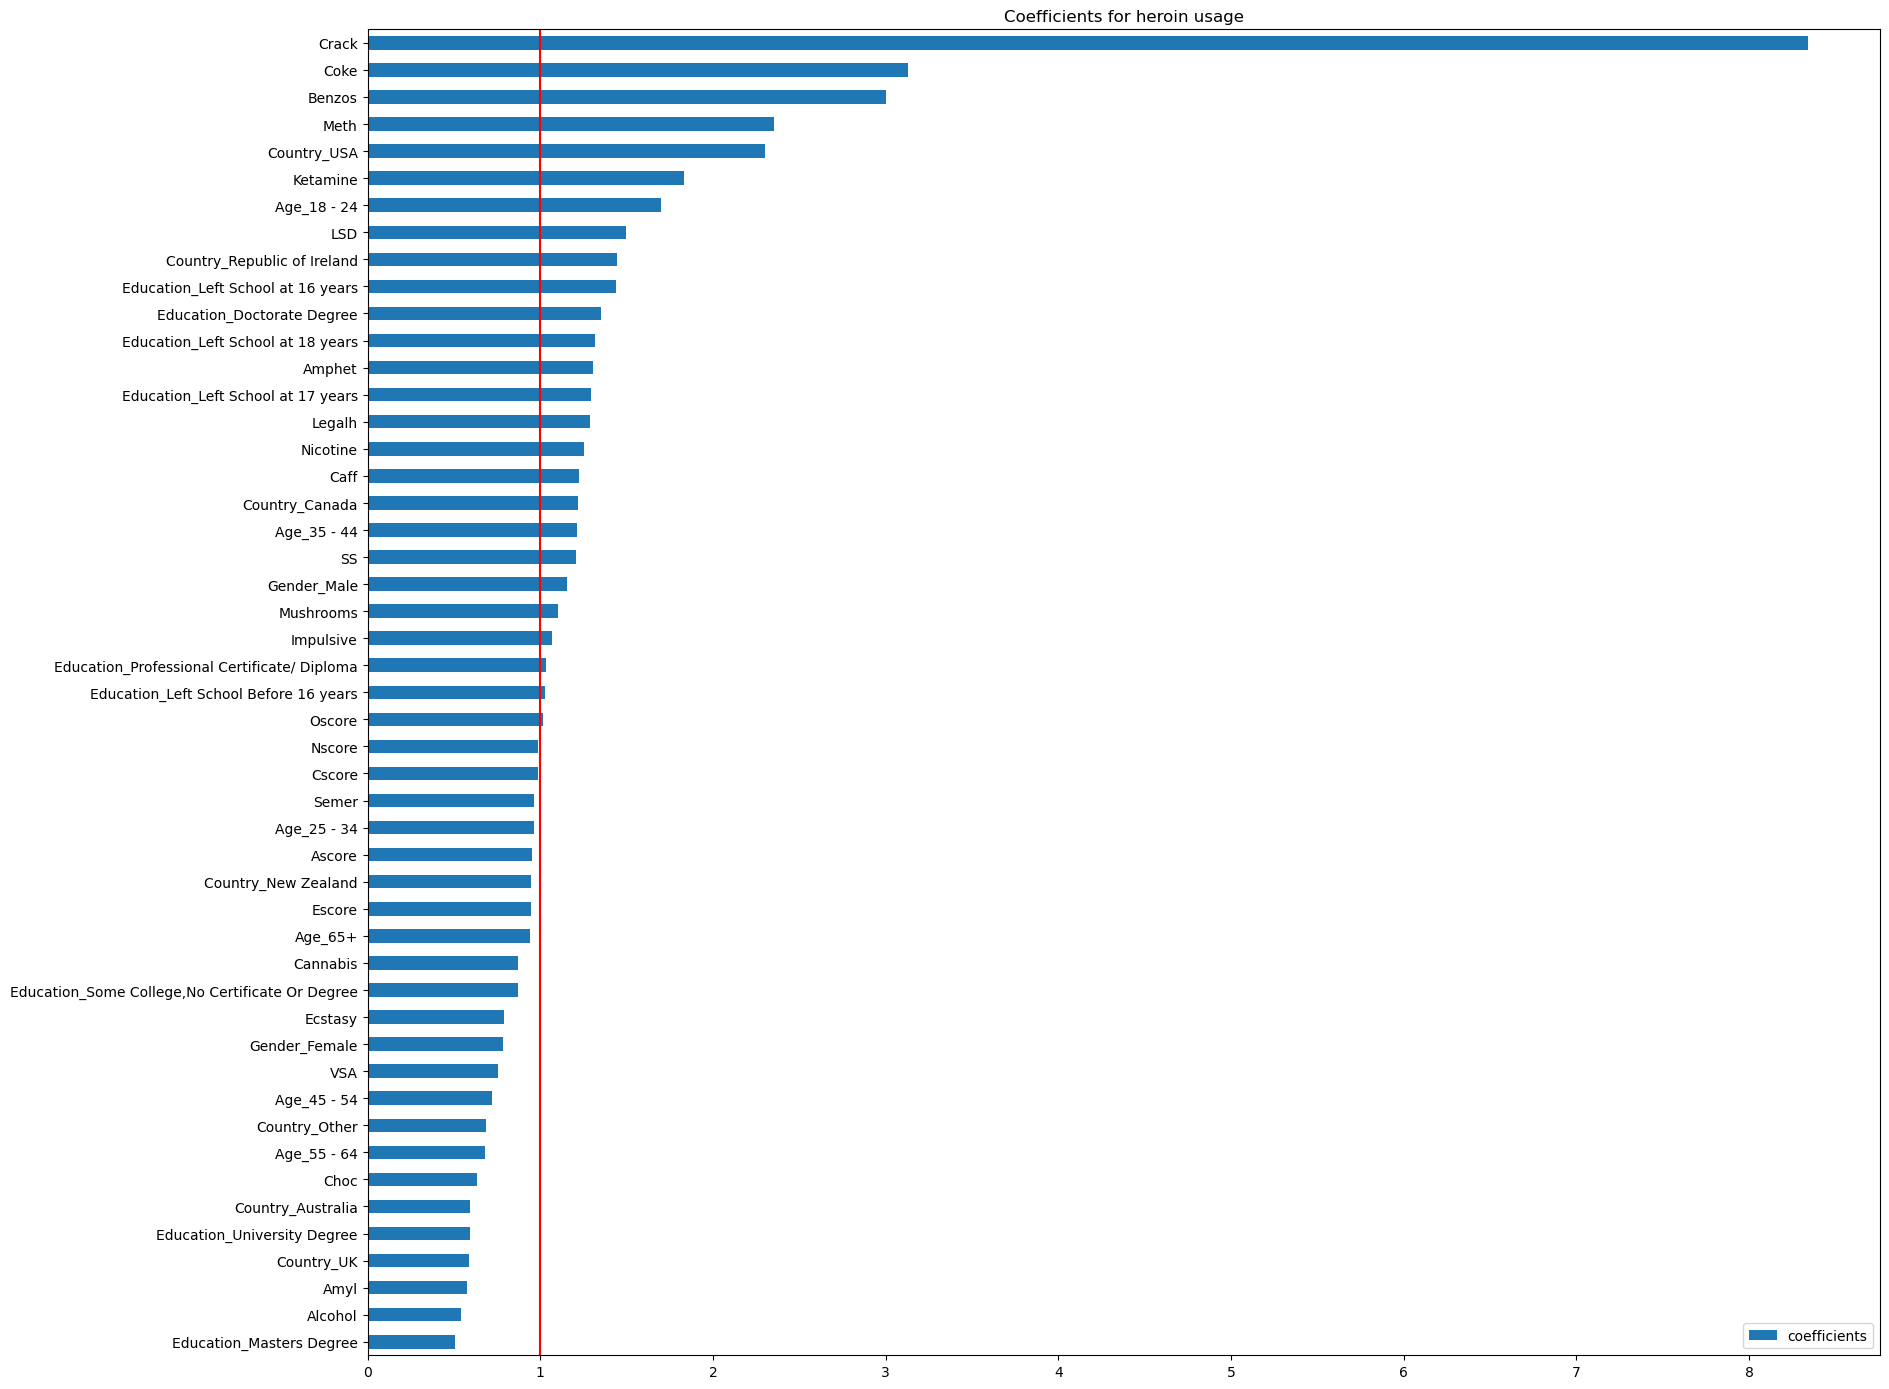

In [7]:
plt.figure()

#Creating a data frame with sorting by 'corfficients'
df1 = pd.DataFrame(
    data={"coefficients": coefficient},
    index=X_train.columns
).sort_values(by="coefficients")

#Plotting the horizontal bar graph
df1.plot(kind="barh", figsize=(19, 14), title="Coefficients for heroin usage")
plt.axvline(1, c='r')
plt.tight_layout()
plt.show()



#### Summary

From the graph analysis, it's evident that several factors strongly correlate with a higher likelihood of heroin use. Individuals currently consuming drugs such as **Crack, Cocaine, Benzodiazepines, Methamphetamine, Nicotine, Amphetamines, Ketamine, LSD, Mushrooms, and Legal** highs are more inclined to use heroin. Demographically, residents of the **USA and Canada**, particularly in the age groups of **18-24 and 35-44 years**, without a **college degree, and predominantly male**, show a higher propensity for heroin use. Additionally, individuals characterized by a high **Sensation Seeking** personality trait, characterized by seeking novel, complex, and intense experiences, are also more likely to use heroin. These findings underscore the importance of targeted interventions aimed at reducing heroin use among these high-risk demographic and behavioral groups.

### Correlations <a id='Corr'></a>

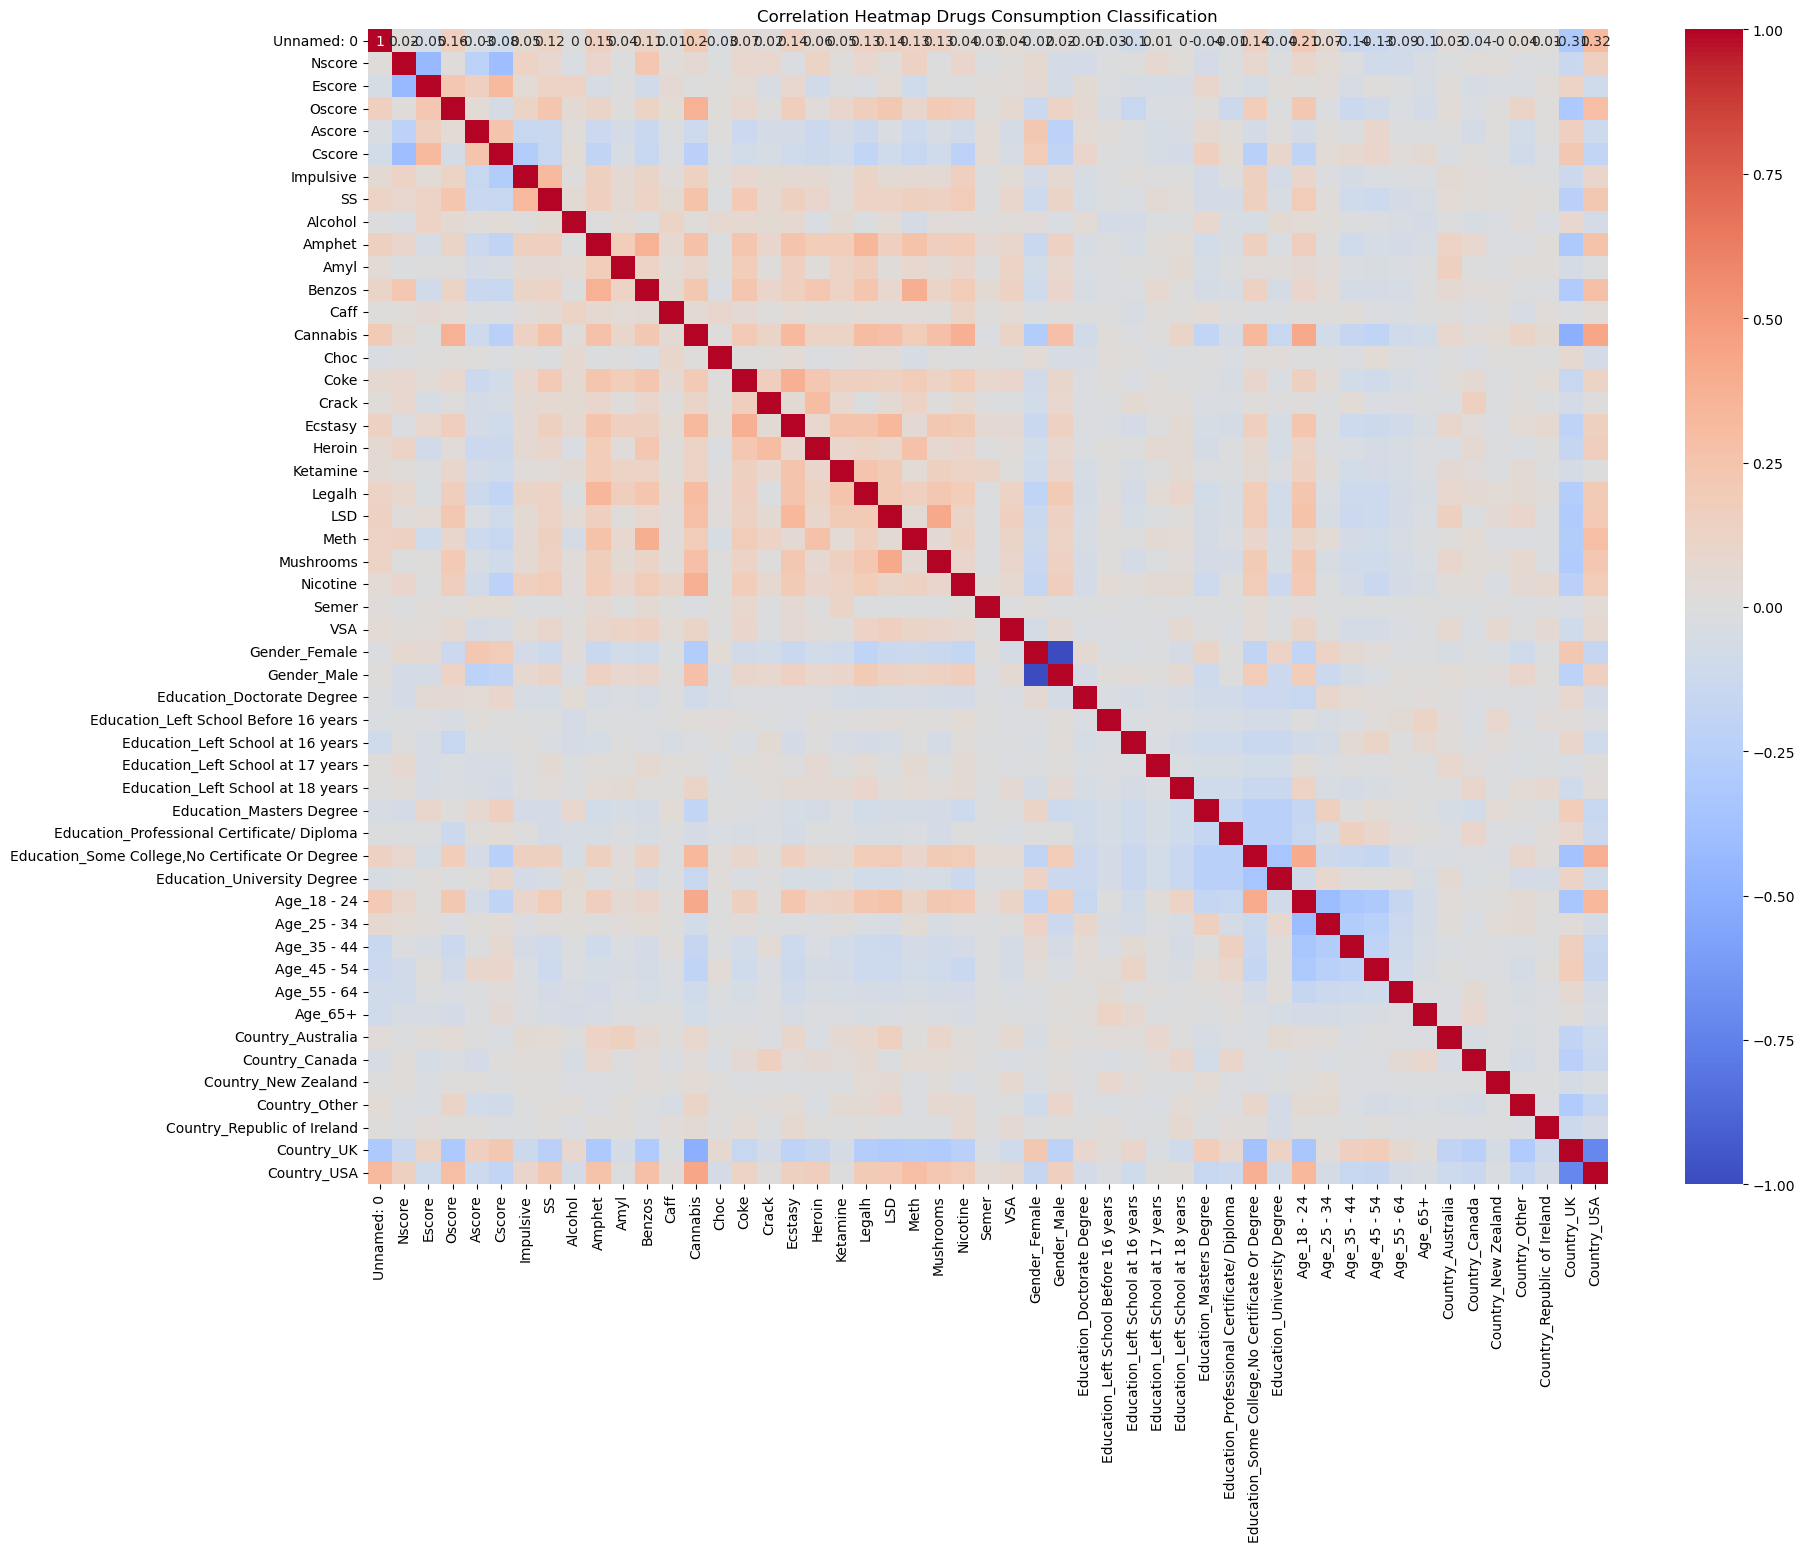

In [8]:
# Checking correlations in the hotel dataset for only numeric features

corr_matrix = df.corr(numeric_only = True)


plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', annot_kws={"size": 10})
plt.title('Correlation Heatmap Drugs Consumption Classification')
plt.show()


The data highlights significant correlations between concurrent use of multiple drugs and specific demographic factors. Younger age groups, individuals holding professional certificates or having some college education, and residents of the USA and Canada demonstrate pronounced tendencies towards engaging in polydrug use.

# INDEX

[Base Models](#Base)


- [Logistic Regression](#logreg)
- [Coefficient analysis](#Coef)
- [Correlations](#Corr)
- [Logistinc Regression Confusion Matrix](#logconf)
- [Decision Tree](#DT)
- [Decision Tree Confusion Matrix](#DTconf)
<a id='INDEX'></a>

### Logistic Regression Confusion Matrix <a id='logconf'></a>

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get class predictions
y_pred = logreg.predict(X_test)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)

display(cf_df)


,Predicted Non-user,Predicted User
True Non-User,455,4
True User,5,3


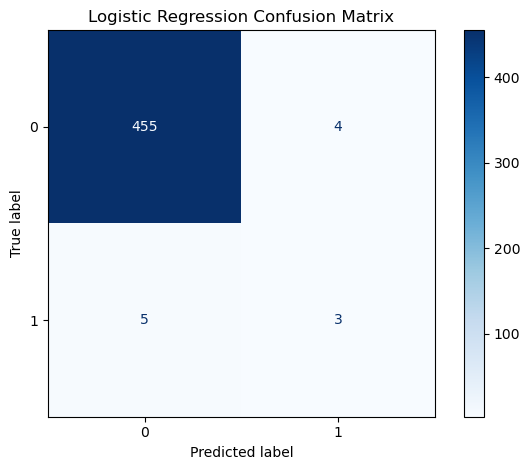

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix with blue colormap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression Confusion Matrix')
plt.tight_layout()
plt.show()


In [27]:
tp = cf_matrix[1, 1]
predicted_usage = cf_matrix[:, 1].sum()

precision = tp/predicted_usage

print(f"Precision = {tp}/{predicted_usage} = {round(precision*100, 2)}%")

Precision = 3/7 = 42.86%


In [29]:
tp = cf_matrix[1, 1]
true_usage = cf_matrix[1, :].sum()

recall = tp/true_usage

print(f"Recall = {tp}/{true_usage} = {round(recall*100, 2)}%")

Recall = 3/8 = 37.5%


In [30]:
# Precision
from sklearn.metrics import precision_score

# precision_score(true labels, predicted labels)
precision_score(y_test, y_pred)

0.42857142857142855

In [31]:
# Recall
from sklearn.metrics import recall_score

# recall_score(true labels, predicted labels)
recall_score(y_test, y_pred)

0.375

In [32]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.39999999999999997

In [33]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       459
           1       0.43      0.38      0.40         8

    accuracy                           0.98       467
   macro avg       0.71      0.68      0.70       467
weighted avg       0.98      0.98      0.98       467



### Summary

The classification results show high precision (99%) and recall (99%) for the non-drug usage class (0), indicating accurate identification of non-users. However, for the heroin usage class (1), precision (43%) and recall (38%) are lower, suggesting that while the model correctly identifies some users, it misses a significant number. Overall accuracy is 98%, reflecting strong performance in predicting non-usage but highlighting potential limitations in detecting drug users.

### Decision Tree <a id='DT'></a>

In [34]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)


print(f"The TRAIN classification accuracy is:  {DT.score(X_train,y_train)}")
print(f"The TEST classification accuracy is:  {DT.score(X_test,y_test)}")


The TRAIN classification accuracy is:  1.0
The TEST classification accuracy is:  0.9678800856531049


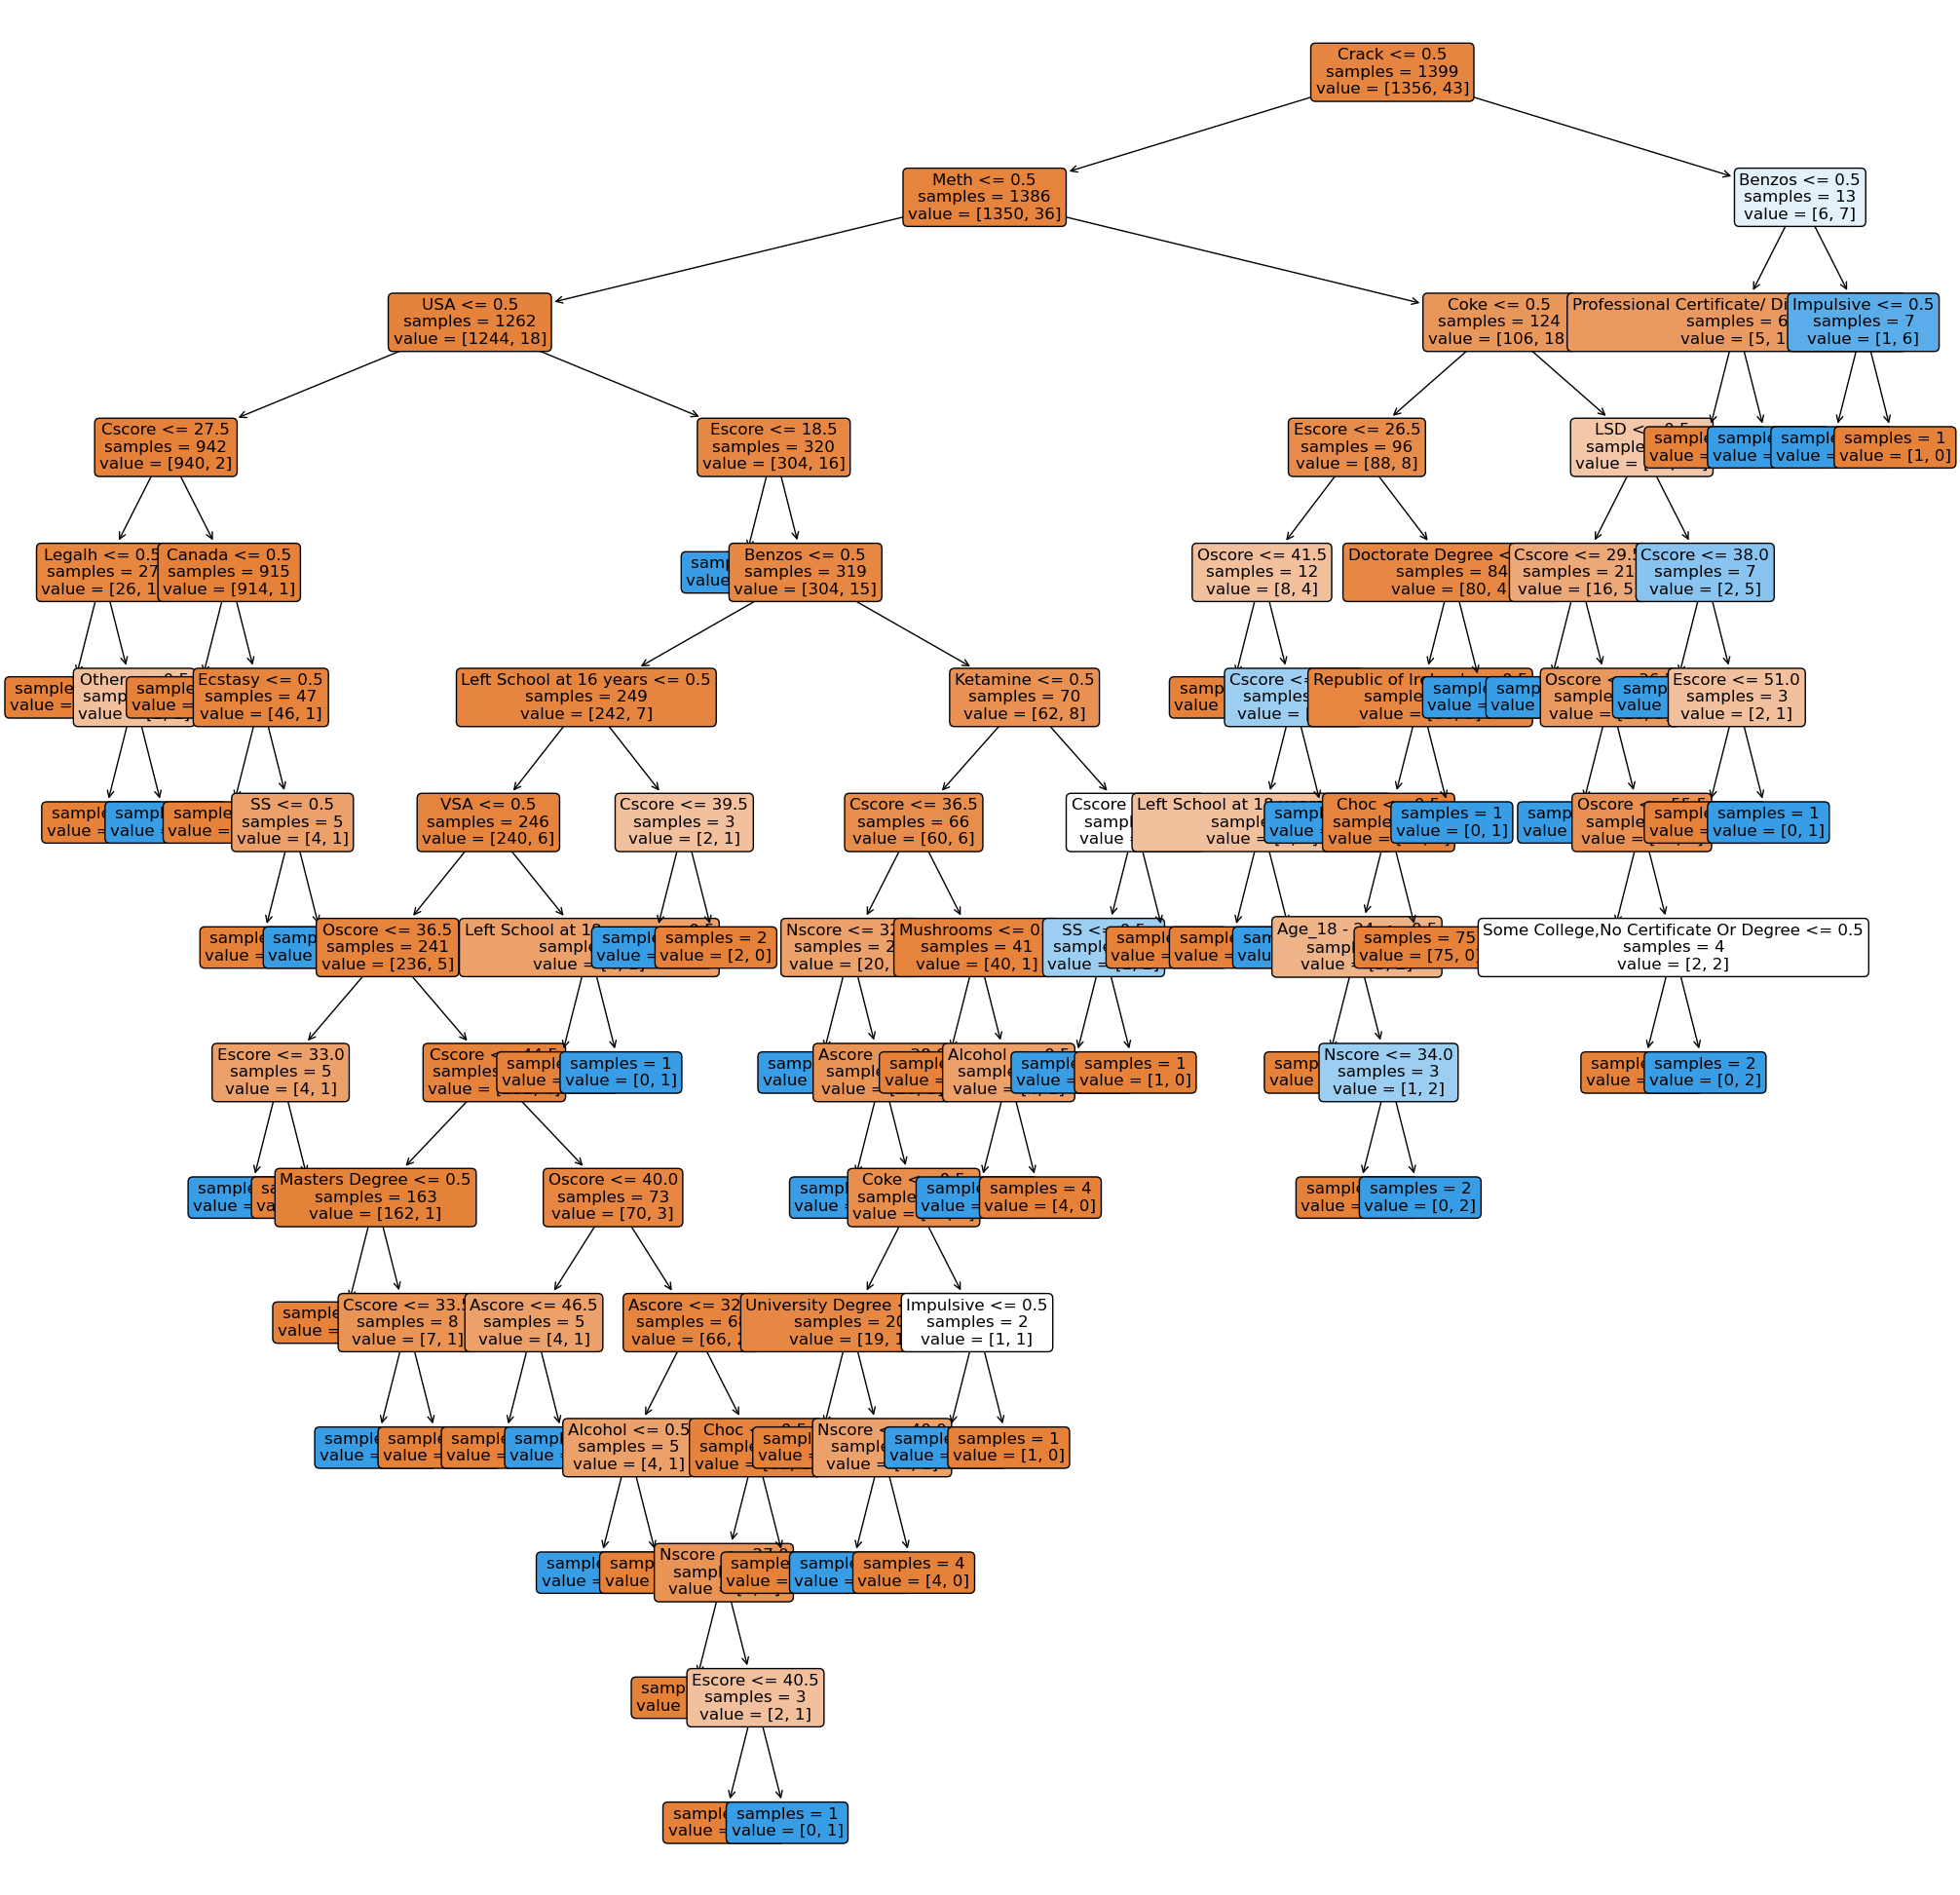

In [35]:
from sklearn.tree import plot_tree
# size for our tree figure
fig, ax = plt.subplots(figsize=(25,25))

plot_tree(DT,
          feature_names=['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS',
       'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc',
       'Coke', 'Crack','Ecstasy', 'Ketamine', 'Legalh', 'LSD', 'Meth',
       'Mushrooms', 'Nicotine', 'Semer', 'VSA', 'Gender_Female', 'Gender_Male',
       'Doctorate Degree', 'Left School Before 16 years',
       'Left School at 16 years','Left School at 17 years',
       'Left School at 18 years', 'Masters Degree',
       'Professional Certificate/ Diploma',
       'Some College,No Certificate Or Degree',
       'University Degree', 'Age_18 - 24', 'Age_25 - 34',
       'Age_35 - 44', 'Age_45 - 54', 'Age_55 - 64', 'Age_65+',
       'Australia', 'Canada', 'New Zealand',
       'Other', 'Republic of Ireland', 'UK', 'USA'],
          rounded=True,
          impurity=False,
          filled=True,
          ax=ax,
          fontsize=12);

### Decision Tree Confusion Matrix <a id='DTconf'></a>

,Predicted Non-user,Predicted User
True Non-User,455,4
True User,5,3


              precision    recall  f1-score   support

           0       0.99      0.98      0.98       459
           1       0.27      0.50      0.35         8

    accuracy                           0.97       467
   macro avg       0.63      0.74      0.67       467
weighted avg       0.98      0.97      0.97       467



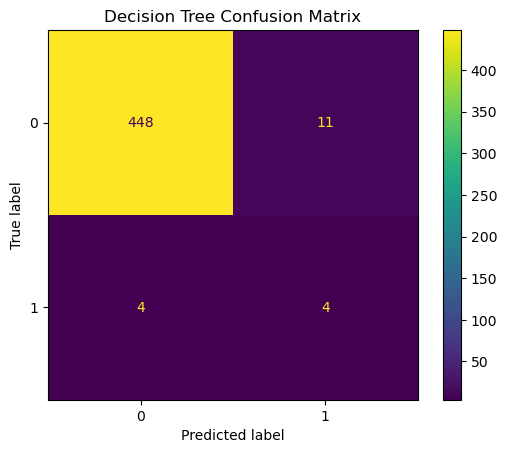

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get class predictions
y_pred1 = DT.predict(X_test)

# Generate confusion matrix
DT_matrix = confusion_matrix(y_test, y_pred1)

# label rows and columns
DT_df = pd.DataFrame(
    DT_matrix,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)

display(cf_df)

# the function expects the estimator, inputs and target as parameters
ConfusionMatrixDisplay.from_estimator(DT, X_test, y_test);
plt.title('Decision Tree Confusion Matrix')


report_initial = classification_report(y_test, y_pred1)
print(report_initial)

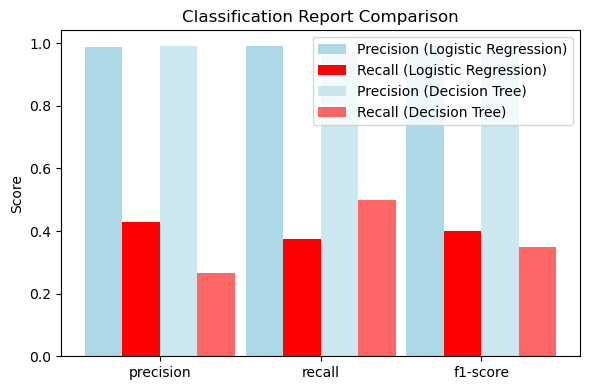

In [52]:
# Generate classification reports
logreg_report = classification_report(y_test, logreg.predict(X_test), output_dict=True)
dt_report = classification_report(y_test, DT.predict(X_test), output_dict=True)

# Extract metrics
models = ['Logistic Regression', 'Decision Tree']
metrics = ['precision', 'recall', 'f1-score']

class_labels = ['0', '1']  # Class labels

# Prepare data for plotting
logreg_data = np.array([[logreg_report[label][metric] for label in class_labels] for metric in metrics])
dt_data = np.array([[dt_report[label][metric] for label in class_labels] for metric in metrics])

# Number of metrics and models
num_metrics = len(metrics)
num_models = len(models)

# Plotting
fig, ax = plt.subplots(figsize=(6, 4))

# Color settings for bars
colors = ['lightblue', 'red']
bar_width = 0.35
bar_positions = np.arange(num_metrics) * 1.5  # Increase space between metric groups

# Plotting bars for Logistic Regression
ax.bar(bar_positions - bar_width/2, logreg_data[:, 0], bar_width, label='Precision (Logistic Regression)', color=colors[0])
ax.bar(bar_positions + bar_width/2, logreg_data[:, 1], bar_width, label='Recall (Logistic Regression)', color=colors[1])

# Plotting bars for Decision Tree
ax.bar(bar_positions + 3*bar_width/2, dt_data[:, 0], bar_width, label='Precision (Decision Tree)', color=colors[0], alpha=0.6)
ax.bar(bar_positions + 5*bar_width/2, dt_data[:, 1], bar_width, label='Recall (Decision Tree)', color=colors[1], alpha=0.6)

# Adding labels, title and legend
ax.set_ylabel('Score')
ax.set_xticks(bar_positions + bar_width)
ax.set_xticklabels(metrics)
ax.set_title('Classification Report Comparison')
ax.legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### Comparison Summary:
The provided results compare the performance of Logistic Regression and Decision Tree models in predicting heroin usage.

**Logistic Regression:**
For non-drug users (class 0), precision is 99%, recall is 98%, and F1-score is 98%. This indicates very few false positives and high accuracy in identifying non-users.
For drug users (class 1), precision is 27%, recall is 50%, and F1-score is 35%. This shows a higher rate of false positives and a moderate ability to identify actual drug users.
Overall accuracy is 97%.

**Decision Tree:**
For non-drug users (class 0), precision is 99%, recall is 98%, and F1-score is 98%. This mirrors the Logistic Regression model's performance in identifying non-users.
For drug users (class 1), precision is 43%, recall is 38%, and F1-score is 40%. This indicates an improvement over the Logistic Regression model in identifying drug users, with lower false positives and better recall.
Overall accuracy is 98%.

**Comparison:**
Both models perform similarly well in identifying non-drug users, with high precision, recall, and F1-scores around 98%.
The Decision Tree model outperforms the Logistic Regression model in predicting drug users, showing higher precision (43% vs. 27%), recall (38% vs. 50%), and F1-score (40% vs. 35%).
Despite these improvements, both models struggle with accurately identifying drug users compared to non-users, as indicated by lower precision and recall for class 1.

**Model Selection:**

****Logistic Regression:**** Better for applications where correctly identifying non-users is crucial, and missing some heroin users is acceptable.
****Decision Tree:**** Slightly better for identifying heroin users, though still not optimal, and might be considered if the cost of false positives is lower than false negatives.

**Balancing Classes:**
Both models suffer from class imbalance, which significantly affects their ability to predict heroin users. Techniques such as oversampling the minority class (heroin users), undersampling the majority class (non-heroin users), or using synthetic data generation methods like SMOTE can help balance the dataset.

**Model Improvement:**

- **Threshold Adjustment:** Adjusting the decision threshold for the Logistic Regression model might improve its recall for heroin users.
- **Ensemble Methods:** Using ensemble techniques (e.g., Random Forests, Gradient Boosting) may improve overall performance, particularly for the minority class.
- **Feature Engineering:**
Adding more relevant features or conducting feature selection to enhance the model's ability to distinguish between heroin users and non-users could lead to better performance.
- **Evaluation Metrics:**
Consider using metrics like the ROC-AUC score, which provides a better understanding of the model's performance across all thresholds, to choose the best model for your specific application needs.

## Conclusion

The analysis highlights the strengths and weaknesses of each model. While Logistic Regression excels in overall accuracy, Decision Trees offer better recall for heroin users, suggesting a trade-off between precision and recall. Future work could involve further tuning these models or exploring more complex algorithms to improve the identification of heroin users.

# INDEX

[Base Models](#Base)


- [Logistic Regression](#logreg)
- [Coefficient analysis](#Coef)
- [Correlations](#Corr)
- [Logistinc Regression Confusion Matrix](#logconf)
- [Decision Tree](#DT)
- [Decision Tree Confusion Matrix](#DTconf)
<a id='INDEX'></a>